# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [24]:
import tensorflow as tf
from tensorflow import keras

keras.__version__

'2.4.0'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [3]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [4]:
import numpy as np
np.__version__

'1.19.5'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [5]:
#########################코드########################


white_wine = pd.read_csv('wine data/winequality-white.csv')
red_wine = pd.read_csv('wine data/winequality-red.csv')


#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [6]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [8]:
#####################################################
def generate_data(df, t_r):
    train = df.sample(frac=t_r, random_state=1)
    test = df.drop(train.index)

    X_train = train.drop(['quality'], axis=1)
    Y_train = train['quality']
    X_test = test.drop(['quality'], axis=1)
    Y_test = test['quality']

    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [9]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

In [10]:
print("Train X size : {}".format(len(x_train)))
print("Train Y size : {}".format(len(y_train)))
print("Test X size : {}".format(len(x_test)))
print("Test Y size : {}".format(len(y_test)))
print("Train set ratio : {}".format(len(x_train) / len(white_wine)))
print("Test set ratio : {}".format(len(x_test) / len(white_wine)))

Train X size : 3429
Train Y size : 3429
Test X size : 1469
Test Y size : 1469
Train set ratio : 0.7000816659861168
Test set ratio : 0.29991833401388324


작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [11]:
##########################################################

keras.backend.clear_session()

white_model = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
])

white_model.compile(optimizer=keras.optimizers.Adam(),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

white_hist = white_model.fit(x_train, y_train, epochs=100)
white_eval = white_model.evaluate(x_test, y_test)

# red wine modeling

red_x_train, red_y_train, red_x_test, red_y_test = generate_data(red_wine, 0.7)

red_model = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
])

red_model.compile(optimizer=keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

red_hist = red_model.fit(red_x_train, red_y_train, epochs=100)
red_eval = red_model.evaluate(red_x_test, red_y_test)

###########################################################

Epoch 1/100
108/108 [==============================] - 1s 1ms/step - loss: 1.8730 - accuracy: 0.2826
Epoch 2/100
108/108 [==============================] - 0s 1ms/step - loss: 1.3645 - accuracy: 0.4364
Epoch 3/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2694 - accuracy: 0.4444
Epoch 4/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2432 - accuracy: 0.4465
Epoch 5/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2144 - accuracy: 0.4367
Epoch 6/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2093 - accuracy: 0.4595
Epoch 7/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2127 - accuracy: 0.4662
Epoch 8/100
108/108 [==============================] - 0s 1ms/step - loss: 1.1741 - accuracy: 0.4597
Epoch 9/100
108/108 [==============================] - 0s 1ms/step - loss: 1.1907 - accuracy: 0.4536
Epoch 10/100
108/108 [==============================] - 0s 1ms/step - loss: 1.1910 - accura

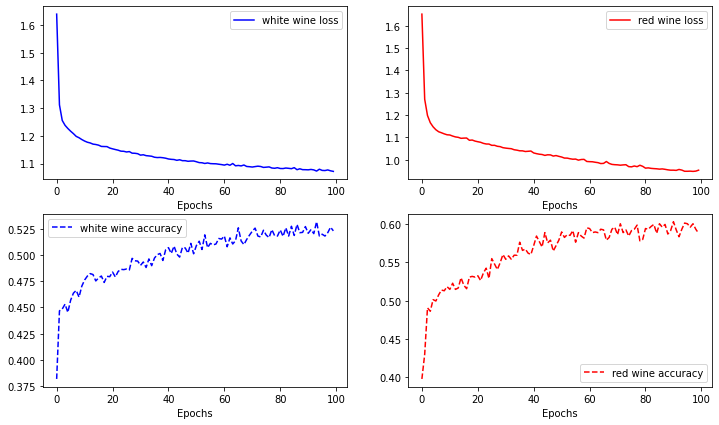

Accuracy (white) : 0.5235
Accuracy (red) : 0.5417


In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.plot(white_hist.history['loss'], 'b-', label='white wine loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(red_hist.history['loss'], 'r-', label='red wine loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(white_hist.history['accuracy'], 'b--', label='white wine accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(red_hist.history['accuracy'], 'r--', label='red wine accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

print("Accuracy (white) : %0.4f" %white_eval[1])
print("Accuracy (red) : %0.4f" %red_eval[1])


### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

In [13]:
white_wine.iloc[:, 0:11].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


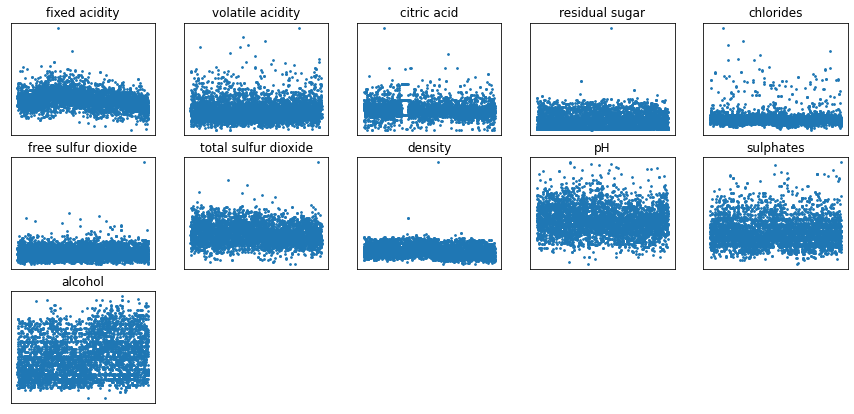

In [14]:
index = [i for i in range(len(white_wine))]
col = white_wine.columns

plt.figure(figsize=(15, 7))

for i in range(len(col)-1):
  colname = col[i]

  plt.subplot(3, 5, i+1)
  plt.scatter(index, white_wine[colname], s=3)
  plt.xticks([])
  plt.yticks([])
  plt.title(colname)

plt.show()

In [15]:
red_wine.iloc[:, 0:11].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


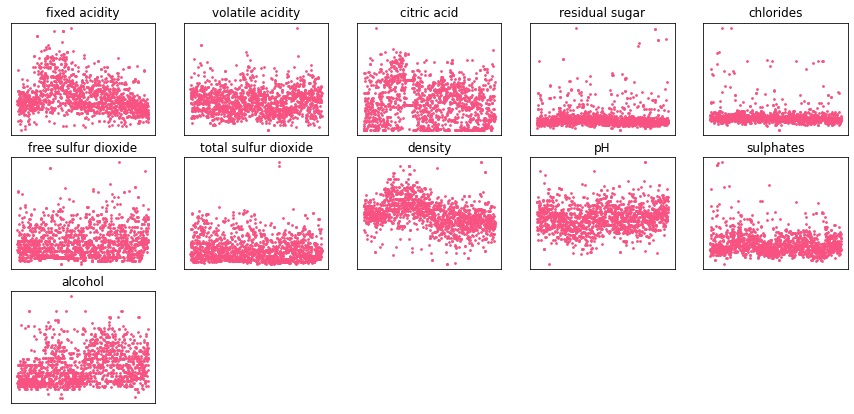

In [16]:
index = [i for i in range(len(red_wine))]
col = red_wine.columns

plt.figure(figsize=(15, 7))

for i in range(len(col)-1):
  colname = col[i]

  plt.subplot(3, 5, i+1)
  plt.scatter(index, red_wine[colname], s=3, c='#F75281')
  plt.xticks([])
  plt.yticks([])
  plt.title(colname)

plt.show()

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import tensorflow.nn as nn
from tensorflow.keras.callbacks import EarlyStopping

In [107]:
##########################################################
# white wine upgrade

keras.backend.clear_session()

white_model_up = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(400, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(400, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(20, activation='relu'),
    Dense(10, activation='softmax')
])

white_model_up.compile(optimizer=keras.optimizers.Adam(),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

scaler = StandardScaler()
scaler.fit(x_train)
scale_white_train = scaler.transform(x_train)
scale_white_test = scaler.transform(x_test)

es = EarlyStopping(monitor="val_accuracy", patience=100, restore_best_weights=True)

white_hist_up = white_model_up.fit(scale_white_train, y_train, 
                                   validation_data=(scale_white_test, y_test), 
                                   callbacks=[es], epochs=1000)
white_eval_up = white_model_up.evaluate(scale_white_test, y_test)

###########################################################

Epoch 1/1000
108/108 [==============================] - 4s 20ms/step - loss: 2.6334 - accuracy: 0.1345 - val_loss: 1.4382 - val_accuracy: 0.4935
Epoch 2/1000
108/108 [==============================] - 2s 17ms/step - loss: 1.5599 - accuracy: 0.3987 - val_loss: 1.3584 - val_accuracy: 0.4935
Epoch 3/1000
108/108 [==============================] - 2s 17ms/step - loss: 1.4105 - accuracy: 0.4247 - val_loss: 1.2402 - val_accuracy: 0.5092
Epoch 4/1000
108/108 [==============================] - 2s 17ms/step - loss: 1.2852 - accuracy: 0.4597 - val_loss: 1.1730 - val_accuracy: 0.5303
Epoch 5/1000
108/108 [==============================] - 2s 17ms/step - loss: 1.2288 - accuracy: 0.4645 - val_loss: 1.1393 - val_accuracy: 0.5317
Epoch 6/1000
108/108 [==============================] - 2s 17ms/step - loss: 1.1722 - accuracy: 0.4928 - val_loss: 1.0872 - val_accuracy: 0.5248
Epoch 7/1000
108/108 [==============================] - 2s 18ms/step - loss: 1.1631 - accuracy: 0.4974 - val_loss: 1.0857 - val_ac

In [101]:
# red wine upgrade
red_model_up = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(400, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(400, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(20, activation='relu'),
    Dense(10, activation='softmax')
])

red_model_up.compile(optimizer=keras.optimizers.Adam(),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

scaler = RobustScaler()
scaler.fit(red_x_train)
scale_red_x_train = scaler.transform(red_x_train)
scale_red_x_test = scaler.transform(red_x_test)

es = EarlyStopping(monitor="val_accuracy", patience=100, restore_best_weights=True)

red_hist_up = red_model_up.fit(scale_red_x_train, red_y_train,
                               validation_data=(scale_red_x_test, red_y_test), 
                               callbacks=[es], epochs=1000)

red_eval_up = red_model_up.evaluate(scale_red_x_test, red_y_test)

Epoch 1/1000
35/35 [==============================] - 3s 26ms/step - loss: 2.8762 - accuracy: 0.1155 - val_loss: 2.0951 - val_accuracy: 0.4083
Epoch 2/1000
35/35 [==============================] - 1s 18ms/step - loss: 2.2072 - accuracy: 0.2823 - val_loss: 1.7590 - val_accuracy: 0.4125
Epoch 3/1000
35/35 [==============================] - 1s 18ms/step - loss: 1.7602 - accuracy: 0.4026 - val_loss: 1.4713 - val_accuracy: 0.4333
Epoch 4/1000
35/35 [==============================] - 1s 18ms/step - loss: 1.6419 - accuracy: 0.4315 - val_loss: 1.3618 - val_accuracy: 0.4083
Epoch 5/1000
35/35 [==============================] - 1s 17ms/step - loss: 1.3621 - accuracy: 0.5113 - val_loss: 1.2022 - val_accuracy: 0.4479
Epoch 6/1000
35/35 [==============================] - 1s 18ms/step - loss: 1.3286 - accuracy: 0.4822 - val_loss: 1.1311 - val_accuracy: 0.5000
Epoch 7/1000
35/35 [==============================] - 1s 18ms/step - loss: 1.2278 - accuracy: 0.5306 - val_loss: 1.0878 - val_accuracy: 0.5229

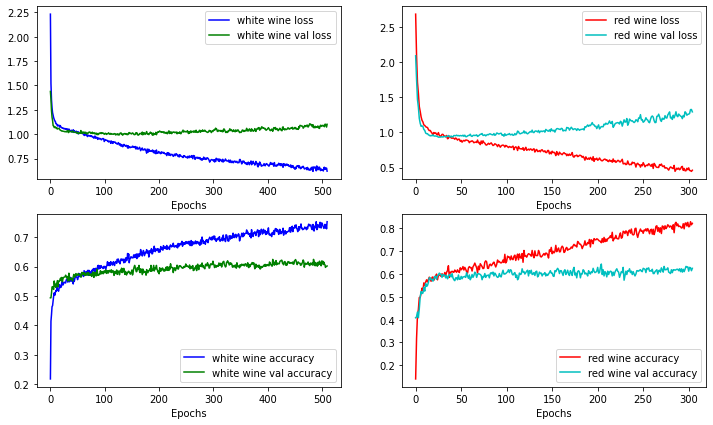

Accuracy (white) : 0.6242
Accuracy (red) : 0.6438


In [108]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.plot(white_hist_up.history['loss'], 'b-', label='white wine loss')
plt.plot(white_hist_up.history['val_loss'], 'g-', label='white wine val loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(red_hist_up.history['loss'], 'r-', label='red wine loss')
plt.plot(red_hist_up.history['val_loss'], 'c-', label='red wine val loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(white_hist_up.history['accuracy'], 'b-', label='white wine accuracy')
plt.plot(white_hist_up.history['val_accuracy'], 'g-', label='white wine val accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(red_hist_up.history['accuracy'], 'r-', label='red wine accuracy')
plt.plot(red_hist_up.history['val_accuracy'], 'c-', label='red wine val accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

print("Accuracy (white) : %0.4f" %white_eval_up[1])
print("Accuracy (red) : %0.4f" %red_eval_up[1])

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


In [109]:
total_wine = pd.concat([white_wine, red_wine], axis=0)

total_x_train = np.concatenate((x_train, red_x_train), axis=0)
total_y_train = np.concatenate((y_train, red_y_train), axis=0)
total_x_test = np.concatenate((x_test, red_x_test), axis=0)
total_y_test = np.concatenate((y_test, red_y_test), axis=0)

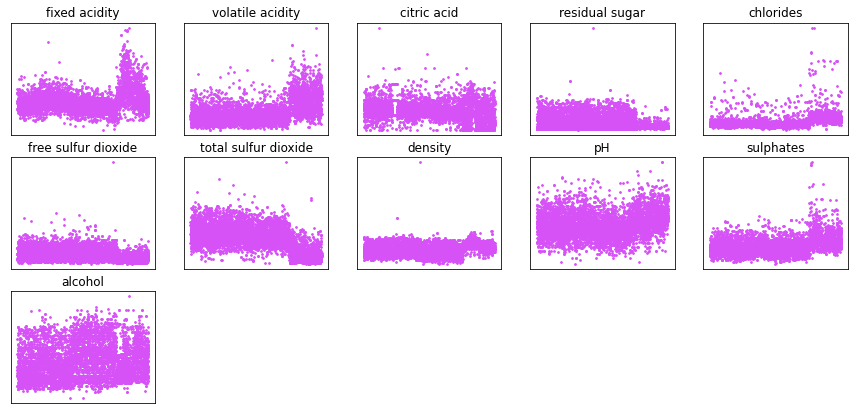

In [110]:
index = [i for i in range(len(total_wine))]
col = total_wine.columns

plt.figure(figsize=(15, 7))

for i in range(len(col)-1):
  colname = col[i]

  plt.subplot(3, 5, i+1)
  plt.scatter(index, total_wine[colname], s=3, c='#D652F7')
  plt.xticks([])
  plt.yticks([])
  plt.title(colname)

plt.show()

In [111]:
##########################################################
keras.backend.clear_session()

total_model = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(512, activation='selu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='selu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(400, activation='selu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(400, activation='selu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(200, activation='selu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='selu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(20, activation='selu'),
    Dense(10, activation='softmax')
])

total_model.compile(optimizer=keras.optimizers.Adam(),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

scaler = RobustScaler()
scaler.fit(total_x_train)
scale_x_train = scaler.transform(total_x_train)
scale_x_test = scaler.transform(total_x_test)

es = EarlyStopping(monitor="val_accuracy", patience=100, restore_best_weights=True)

total_hist = total_model.fit(scale_x_train, total_y_train, 
                             validation_data=(scale_x_test, total_y_test),
                             callbacks=[es],
                             batch_size=100, epochs=1000)

total_eval = total_model.evaluate(scale_x_test, total_y_test)
###########################################################

Epoch 1/1000
46/46 [==============================] - 3s 34ms/step - loss: 3.0568 - accuracy: 0.1893 - val_loss: 2.2947 - val_accuracy: 0.4926
Epoch 2/1000
46/46 [==============================] - 1s 28ms/step - loss: 2.0359 - accuracy: 0.3775 - val_loss: 1.6555 - val_accuracy: 0.4407
Epoch 3/1000
46/46 [==============================] - 1s 28ms/step - loss: 1.6256 - accuracy: 0.4346 - val_loss: 1.3135 - val_accuracy: 0.4838
Epoch 4/1000
46/46 [==============================] - 1s 28ms/step - loss: 1.3960 - accuracy: 0.4662 - val_loss: 1.2081 - val_accuracy: 0.5254
Epoch 5/1000
46/46 [==============================] - 1s 28ms/step - loss: 1.2938 - accuracy: 0.4707 - val_loss: 1.1519 - val_accuracy: 0.5264
Epoch 6/1000
46/46 [==============================] - 1s 29ms/step - loss: 1.2552 - accuracy: 0.4710 - val_loss: 1.1972 - val_accuracy: 0.4890
Epoch 7/1000
46/46 [==============================] - 1s 28ms/step - loss: 1.2127 - accuracy: 0.4816 - val_loss: 1.1502 - val_accuracy: 0.5059

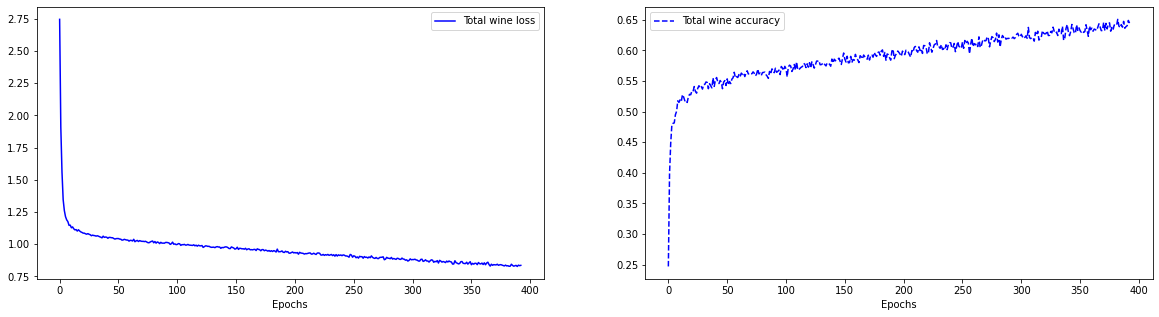

Accuracy (total) : 0.6080


In [112]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(total_hist.history['loss'], 'b-', label='Total wine loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(total_hist.history['accuracy'], 'b--', label='Total wine accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

print("Accuracy (total) : %0.4f" %total_eval[1])